In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

In [2]:
train_dir = "C:/Users/Timii/Documents/Dev/Zummit/dataset/training_set"
test_dir = "C:/Users/Timii/Documents/Dev/Zummit/dataset/test_set"

In [3]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1, kernel_regularizer=l2(0.01),activation = "linear"))

model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [5]:
history = model.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
250/250 [==============================] - 120s 473ms/step - loss: 0.9435 - accuracy: 0.5433 - val_loss: 0.7879 - val_accuracy: 0.6495
Epoch 2/15
250/250 [==============================] - 41s 165ms/step - loss: 0.7707 - accuracy: 0.6365 - val_loss: 0.7715 - val_accuracy: 0.7005
Epoch 3/15
250/250 [==============================] - 40s 160ms/step - loss: 0.6915 - accuracy: 0.6754 - val_loss: 0.6266 - val_accuracy: 0.7115
Epoch 4/15
250/250 [==============================] - 39s 158ms/step - loss: 0.6442 - accuracy: 0.6959 - val_loss: 0.6269 - val_accuracy: 0.7305
Epoch 5/15
250/250 [==============================] - 40s 161ms/step - loss: 0.6120 - accuracy: 0.7110 - val_loss: 0.5756 - val_accuracy: 0.7310
Epoch 6/15
250/250 [==============================] - 40s 161ms/step - loss: 0.5894 - accuracy: 0.7203 - val_loss: 0.5731 - val_accuracy: 0.7530
Epoch 7/15
250/250 [==============================] - 41s 165ms/step - loss: 0.5659 - accuracy: 0.7396 - val_loss: 0.6031 - val_a

In [19]:
# model.save('model.h5')
model = tf.keras.saving.load_model('model.h5')

tf.Tensor([[-0.5162436]], shape=(1, 1), dtype=float32)


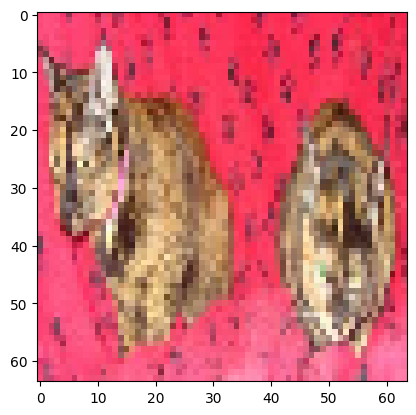

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

for i in test_set:
    img = i[0][30]
    plt.imshow(img);
    # image = Image.fromarray(img)
    # img.save('my.png')
    # image.show()
    print(model(np.expand_dims(img, 0)))
    break